# Mini Project

This data set Diet_R2.csv contains information on 78 people using one of three diets. The dataset is primarily used for ANOVA. 

-   Paired t-test:
Ignore diet and test to see if weight has been lost

- One way ANOVA :
Which diet was best for losing weight?
Are there gender differences for weight lost?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('Diet_R.csv')
df


,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [3]:
df.groupby('Diet').count()

,Person,gender,Age,Height,pre.weight,weight6weeks
Diet,,,,,,
1,24,24,24,24,24,24
2,27,27,27,27,27,27
3,27,27,27,27,27,27


# t -test
- Question 1: First, we want to know whether our sample of people lost weight after 6 weeks of whethever diet they follow. For that we need to do a t- test with the following hypothesis:

H0 : µpreweight = µweight6weeks

Ha : µpreweight > µweight6weeks

In order to test our null hypothesis, we first need to stablish our level of confidence. In this case, I, as an analyst, choose a confidence level of 95 %, that is, I give my experiment an error level as a tolerance of 5 %.

In order to quickly review the descriptive statistics of my control and my measurement after six weeks

In [4]:
#Descriptive statatistics
List_preweight= df['pre.weight']
List_weight6weeks = df['weight6weeks']
#print(List_preweight, List_weight6weeks)

DS_preweigh = List_preweight.describe()
DS_weight6weeks=List_weight6weeks.describe() 

print(DS_preweigh, DS_weight6weeks )

count     78.000000
mean      72.525641
std        8.723344
min       58.000000
25%       66.000000
50%       72.000000
75%       78.000000
max      103.000000
Name: pre.weight, dtype: float64 count     78.000000
mean      68.680769
std        8.924504
min       53.000000
25%       61.850000
50%       68.950000
75%       73.825000
max      103.000000
Name: weight6weeks, dtype: float64


In [5]:
the mean Xpreweight = 72.525641 and Xweight6weeks = 68.680769
the std  Spreweight = 8.723344 and SXweight6weeks = 8.924504

SyntaxError: invalid syntax (3245734412.py, line 1)

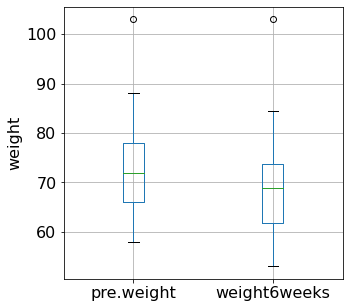

In [6]:
# Boxplots to check the weigh before and after (78 people)
ax = df.boxplot(column=['pre.weight', 'weight6weeks'], fontsize=16, figsize=(5, 5))
#ax.set_xlabel("x_label");
ax.set_ylabel("weight", fontsize=16);
ax = plt.savefig('boxplot-weight_lost.png')
ax = plt.show()


# Boxplots of my original population (78 people)
#ax = sns.boxplot(x='Diet', y='weigh_lost', data=df, palette="Set2")
# le paramètre palette donne différents sets de couleurs
#plt.show()


At first glance, based on only the means and standard deviations, it would appear that there was a total decrease in weight in the group after six weeks of dieting. However, to apply our confidence criterion, it is necessary to do the t-test
We test our null hypothesis by using a t-test. 

In [7]:
#We test our null hypothesis by using a t-test.
#"Probability of getting a difference between sample means is",
#Prob = 1 - st.t.cdf(t, ddl)) 
# to calculate t:

Xpreweight= df['pre.weight'].mean()
Xweight6weeks = df['weight6weeks'].mean()
Spreweight= df['pre.weight'].std()
Sweight6weeks = df['weight6weeks'].std()

print("the mean Xpreweight = %f and Xweight6weeks = %f" % (Xpreweight, Xweight6weeks))
print("the std  Spreweight = %f and SXweight6weeks = %f" % (Spreweight , Sweight6weeks))
      
n1=78
n2=78
dof=n1+n2-2
ccdof= np.sqrt((1/n1) +(1/n2))
Spooled= np.sqrt(((n1-1)*((Spreweight)**2) +(n2-1)*((Sweight6weeks)**2))/((n1+n2)-2))
et=Spooled*ccdof

t = (Xpreweight - Xweight6weeks)/et
print ("the t value is t = %f" % t)

#since the total degrees of freedom are dof=(n1+n2)-2.  

Prob_gauche=st.t.cdf(t,dof )

Prob_droit=1-Prob_gauche

print("Prob=%f and (1-Prob)=%f "% (Prob_gauche, Prob_droit))   

print("According to this test, the probability of getting a difference between our sample before and after the diet is (1-Prob)=0.003629 ")

the mean Xpreweight = 72.525641 and Xweight6weeks = 68.680769
the std  Spreweight = 8.723344 and SXweight6weeks = 8.924504
the t value is t = 2.720973
Prob=0.996371 and (1-Prob)=0.003629 
According to this test, the probability of getting a difference between our sample before and after the diet is (1-Prob)=0.003629 


In [8]:
0.003629*2

0.007258

In [9]:
#statistic_two-sided, pvalue_two-sided = st.ttest_ind(df['pre.weight'], df['weight6weeks'], alternative='two-sided')
statistic_greater, pvalue_greater= st.ttest_ind(df['pre.weight'], df['weight6weeks'], alternative = 'greater')
statistic_less, pvalue_less = st.ttest_ind(df['pre.weight'], df['weight6weeks'], alternative = 'less')

print(statistic_greater, pvalue_greater)
print(statistic_less, pvalue_less)

2.720972750635475 0.0036292068344625558
2.720972750635475 0.9963707931655374


In [10]:
display(st.ttest_ind(df['pre.weight'], df['weight6weeks'], alternative='two-sided'))


Ttest_indResult(statistic=2.720972750635475, pvalue=0.0072584136689251115)

In [11]:
1-0.9963707931655374

0.0036292068344625505

Therefore, according with this t-test and our stablished threshold for a confidence level of 95%, we can reject the H0. Considering only the probability for one side of the curve (the positive side) which stablishes the probability (1-Prob = 0.00363) of having a population with a weight larger than the mean, we can asssume the alternative Ha as valid. 

# ANOVA
Question 2: We want to know whether the type of diet (3 qualitative variables) has an influence on the lost of weigh (after 6 weeks). ANOVA

In [12]:
df.groupby('Diet').count()

,Person,gender,Age,Height,pre.weight,weight6weeks
Diet,,,,,,
1,24,24,24,24,24,24
2,27,27,27,27,27,27
3,27,27,27,27,27,27


We are going to use an ANOVA to test our hypothesis, since we want to meassure the impact of different modalities (three different diets) have an effect one quantity (weigh lost). However, in order to use ANOVA, we need the degrees of freedom for each of the stimated variances (i.e. within each of the groups to be equal). Since we have 24 people in the first group (following Diet 1), we need to re-sample to ghave our three groups with equal degrees of freedom. 

In [13]:
#To do this resampling, I am going to take 16  people out of the three different groups
sampled = df.groupby("Diet").sample(n=16, random_state = 4) # random_stat selectionne une seed
#sampled
display(sampled.shape, sampled.head())

(48, 7)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
53,23,1,39,166,87,1,81.9
52,22,1,42,166,85,1,81.5
2,1,0,22,159,58,1,54.2
5,4,0,33,171,64,1,61.1
14,13,0,41,163,72,1,68.4


In [14]:
sampled.groupby('Diet').count()

,Person,gender,Age,Height,pre.weight,weight6weeks
Diet,,,,,,
1,16,16,16,16,16,16
2,16,16,16,16,16,16
3,16,16,16,16,16,16


- Therefore, my hypothesis are that within this new sample of 16 peaple in each group:

H0: σ2_D1 = σ2_D2 = σ2_D3 

Ha: at least one of the σ2 is different 

In [15]:
# To analyse the type of diets wrt the lost of weigh, 
#first we need to create a new column that contains the difference 
# between the weigh before and after : 
#Therefore, the difference between the weigh before and after will be given by: 

df['weigh_lost'] = df['pre.weight'].sub(df['weight6weeks'], axis = 0)
display(df.shape, df.head())

(78, 8)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weigh_lost
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


In [16]:
stats = df[['Diet','weigh_lost']].groupby('Diet')\
    .agg({'weigh_lost': ['mean','std','count']})\
    .reset_index(col_level=1)
stats

weigh_lost                
  Diet       mean       std count
0    1   3.300000  2.240148    24
1    2   3.025926  2.523367    27
2    3   5.148148  2.395568    27

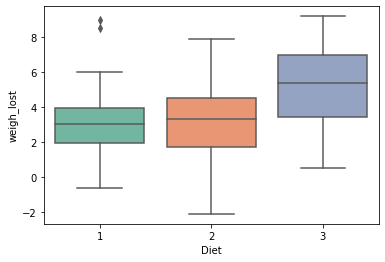

In [17]:
# Boxplots of my original population (78 people)
ax = sns.boxplot(x='Diet', y='weigh_lost', data=df, palette="Set2")
# le paramètre palette donne différents sets de couleurs
plt.show()

In [18]:
# To analyse the type of diets wrt the lost of weigh, 
#first we need to create a new column that contains the difference 
# between the weigh before and after : 
#Therefore, the difference between the weigh before and after will be given by: 

sampled['weigh_lost'] = sampled['pre.weight'].sub(sampled['weight6weeks'], axis = 0)
display(sampled.shape, sampled.head())

(48, 8)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weigh_lost
53,23,1,39,166,87,1,81.9,5.1
52,22,1,42,166,85,1,81.5,3.5
2,1,0,22,159,58,1,54.2,3.8
5,4,0,33,171,64,1,61.1,2.9
14,13,0,41,163,72,1,68.4,3.6


In [19]:
stats_sampled= sampled[['Diet','weigh_lost']].groupby('Diet')\
    .agg({'weigh_lost': ['mean','std','count']})\
    .reset_index(col_level=1)
stats_sampled

weigh_lost                
  Diet       mean       std count
0    1    2.83750  1.314471    16
1    2    3.38125  2.294695    16
2    3    4.96875  2.071624    16

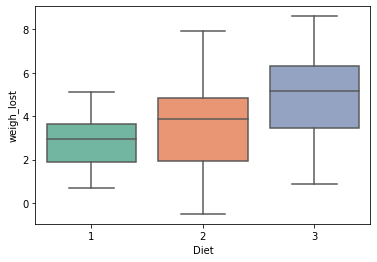

In [20]:
# Boxplots of my three samples consisting of 16 people each:
ax = sns.boxplot(x='Diet', y='weigh_lost', data=sampled, palette="Set2")
# le paramètre palette donne différents sets de couleurs
plt.show()

In [21]:
Diet_1 = sampled[sampled['Diet']== 1]['weigh_lost']
Diet_2 = sampled[sampled['Diet']== 2]['weigh_lost']
Diet_3 = sampled[sampled['Diet']== 3]['weigh_lost']

#print(np.array(Diet_3))


In [22]:
D1 = df[df['Diet']== 1]['weigh_lost']
D2 = df[df['Diet']== 2]['weigh_lost']
D3 = df[df['Diet']== 3]['weigh_lost']

print(np.array(D3))


[7.  5.6 3.4 6.8 7.8 5.4 6.8 7.2 7.  7.3 0.9 7.6 4.1 6.3 5.  2.5 0.9 3.5
 0.5 2.8 8.6 4.5 2.8 4.1 5.3 9.2 6.1]


The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [23]:
#To calculate of values F and p, we can use the df arrays from our sampled:  
F, p = st.f_oneway(Diet_1, Diet_2, Diet_3)
print("The F and p values are F=%.10f , pvalue =%.12f" % (F, p))

The F and p values are F=5.2161223149 , pvalue =0.009175423087


The pvalue of 0.009175423087 (0.92 %), implies that, again with a level of confidence of 95%, we can not reject our H0 that states that al the variances are equal ( σ2_D1 = σ2_D2 = σ2_D3), when taking a sample of 16 people in each group. 

In [70]:
#To calculate of values F and p, we can use the original dataframe arrays:  #
F, p = st.f_oneway(D1, D2, D3)
print("The F and p values are F=%.10f , pvalue =%.12f" % (F, p))

The F and p values are F=6.1974474532 , pvalue =0.003229014239


In [71]:
# OLS Méthode qui utilise explicitement un modèle de régression, permet d'avoir les paramètres de l'ANOVA 

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weigh_lost ~ C(Diet)', data=sampled).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# typ est le type d'anova test à réaliser, le 1 est apparement peu utilisé, le 2 est le plus commun, utilisé lorsque
# qu'il n'y a pas d'interactions entre nos modalités (tirages indépendants)
anova_table
display(anova_table)

print(model.summary())



,sum_sq,df,F,PR(>F)
C(Diet),39.242917,2.0,5.216122,0.009175
Residual,169.276250,45.0,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:             weigh_lost   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     5.216
Date:                Thu, 02 Dec 2021   Prob (F-statistic):            0.00918
Time:                        02:04:33   Log-Likelihood:                -98.357
No. Observations:                  48   AIC:                             202.7
Df Residuals:                      45   BIC:                             208.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8375      0.485      5.852   

# COCHRAN TEST

The idea is to calculate our variances for each of the groups ( for each type of diet), and compare the one with a maximum value (amongh them) with respect to the sum of the 
variances, to see whether this observed value, called the gobs, falls into the non-rectection zone with a level of 95% of confidence, given the F value obtained avobe.  


In [68]:
std_D1 = df[df['Diet']== 1]['weigh_lost'].std()
std_D2 = df[df['Diet']== 2]['weigh_lost'].std()
std_D3 = df[df['Diet']== 3]['weigh_lost'].std()

Var_D1=np.sqrt(std_D1)
Var_D2=np.sqrt(std_D2)
Var_D3=np.sqrt(std_D3)
print(("Var_D1=%f, Var_D2=%f, Var_D3=%f" )%(Var_D1, Var_D2, Var_D3))

Variances=[Var_D1, Var_D2, Var_D3]

Sum_Variances = np.sum(Variances)
max_Variance =max(Variances)

print(("the sum of variances (Var_D1 + Var_D2 + Var_D3) = %.12f") % (Sum_Variances))

gobs= (max_Variance/Sum_Variances)
print(("the value of gobs = %.12f") % (gobs))

# Given that the number of variables I have is 3 (three different types of diet) 
#the theorethical gvalue at 95% confidence  for the 3 variances (k)  of normal populations 
#has to be equal: g = 0.5466 

# Since our gobs < g, it falls into the non-rejection zone. 
#Therefore, we fail to reject the null hypotheis!!!! 


Var_D1=1.496712, Var_D2=1.588511, Var_D3=1.547762
the sum of variances (Var_D1 + Var_D2 + Var_D3) = 4.632985323131
the value of gobs = 0.342869812061


Var_D1=1.496712, Var_D2=1.588511, Var_D3=1.547762
4.632985323130945
the sum of variances (Var_D1 + Var_D2 + Var_D3) = 4.632985